In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
df=pd.read_csv("adult 3.csv")

In [129]:
df.shape

(48842, 15)

In [130]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [131]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [132]:
df.workclass.replace({'?':'Others'},inplace=True)
df.occupation.replace({'?':'Others'},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15580\291027331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.workclass.replace({'?':'Others'},inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15580\291027331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [133]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [134]:
df.drop(df[df["workclass"]=="Without-pay"].index,inplace=True)
df.drop(df[df["workclass"]=="Never-worked"].index,inplace=True)

In [135]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64

In [136]:
df.shape

(48811, 15)

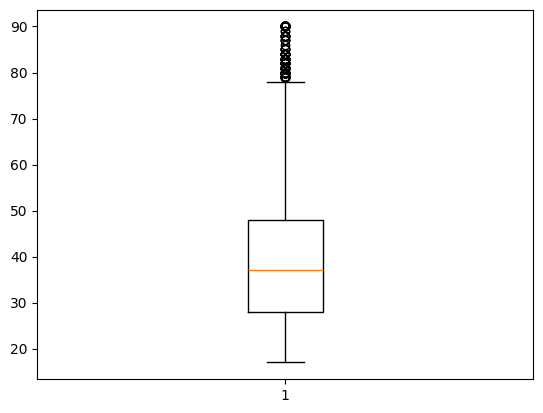

In [137]:
plt.boxplot(df['age'])
plt.show()

In [138]:
df=df[(df['age']>=17)&(df['age']<=76)]

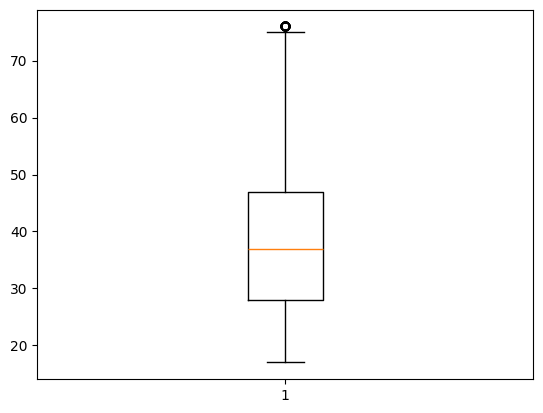

In [139]:
plt.boxplot(df['age'])
plt.show()

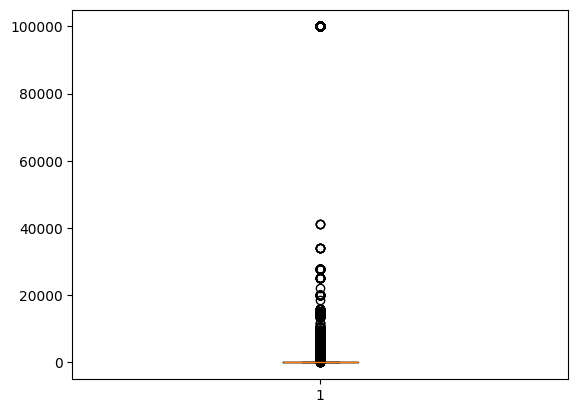

In [140]:
plt.boxplot(df['capital-gain'])
plt.show()

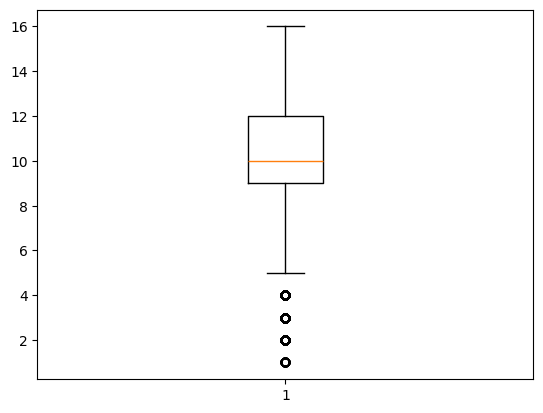

In [141]:
plt.boxplot(df['educational-num'])
plt.show()

In [142]:
df=df[(df['educational-num']<=16)&(df['educational-num']>=5)]

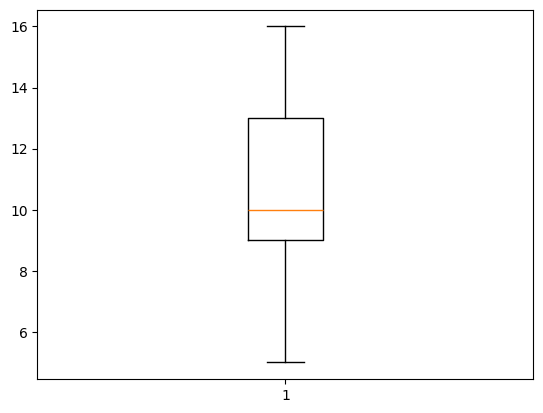

In [143]:
plt.boxplot(df['educational-num'])
plt.show()

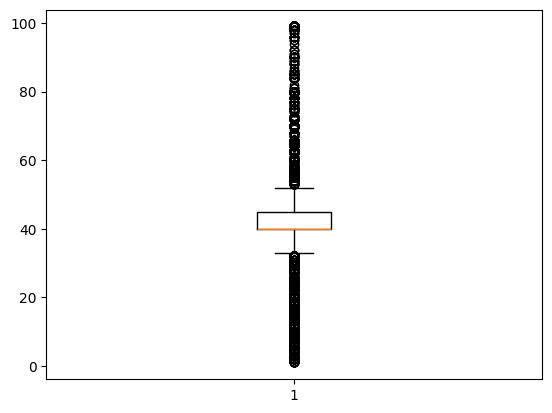

In [144]:
plt.boxplot(df['hours-per-week'])
plt.show()

In [145]:
df=df.drop(columns=['education'])

In [146]:
df.shape

(46775, 14)

In [147]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
df['workclass']=encoder.fit_transform(df['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
df['marital-status']=encoder.fit_transform(df['marital-status'])   #3 categories 0, 1, 2
df['occupation']=encoder.fit_transform(df['occupation'])
df['relationship']=encoder.fit_transform(df['relationship'])      #5 categories  0, 1, 2, 3, 4
df['race']=encoder.fit_transform(df['race'])  
df['gender']=encoder.fit_transform(df['gender'])    #2 catogories     0, 1
df['native-country']=encoder.fit_transform(df['native-country'])

In [148]:
df.head(7)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
5,34,3,198693,6,4,7,1,4,1,0,0,30,39,<=50K
6,29,2,227026,9,4,8,4,2,1,0,0,40,39,<=50K


In [149]:
x=df.drop(columns=['income'])
y=df[['income']]

In [150]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [151]:
y

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [153]:
x_train.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
34020,42,3,187294,10,0,2,4,4,1,0,0,40,39
19028,46,3,166003,7,2,6,0,4,1,0,0,40,39
19196,26,3,198163,14,2,12,5,4,0,0,0,40,39
45766,30,5,609789,11,4,2,1,4,1,0,0,40,39
33872,56,3,329059,9,2,6,0,4,1,0,0,40,22


In [154]:
x_test.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
13819,54,3,105428,9,0,2,1,4,1,0,1741,40,39
3215,19,3,225156,5,2,2,0,4,1,0,0,45,39
1061,23,3,283969,6,4,5,3,4,1,0,0,40,26
8762,47,3,100009,10,0,3,1,4,1,0,0,30,39
12724,38,5,164593,13,4,3,1,4,1,0,0,30,0


In [155]:
y_train.head()

,income
34020,<=50K
19028,<=50K
19196,<=50K
45766,<=50K
33872,>50K


In [156]:
y_test.head()

,income
13819,<=50K
3215,<=50K
1061,<=50K
8762,<=50K
12724,<=50K


In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

LogisticRegression: 0.8047
RandomForest: 0.8596
KNN: 0.7730


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM: 0.7973


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoosting: 0.8669

✅ Best model: GradientBoosting with accuracy 0.8669
✅ Saved best model as best_model.pkl


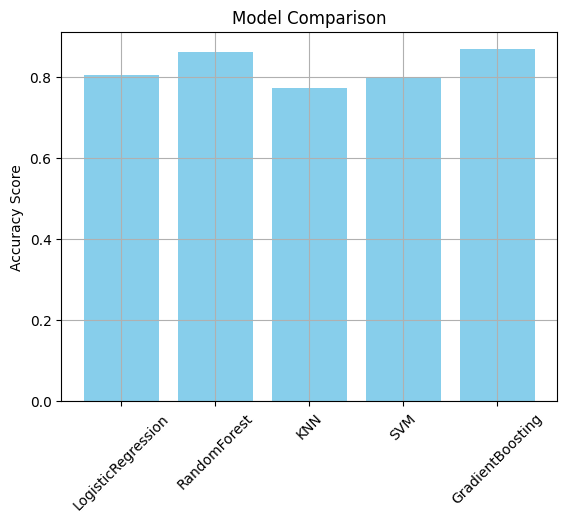

In [161]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
